In [15]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

data.shape
#表示1338 rows and 7 columns

(1338, 7)

In [2]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#變項中有幾種不同的值
unique_values = data['region'].unique()
print(unique_values)

['southwest' 'southeast' 'northwest' 'northeast']


In [16]:
#重新定義變項
data2 = pd.DataFrame(data)
data2['sex'] = data2['sex'].map({'male': 1, 'female': 2})
data2['smoker'] = data2['smoker'].map({'no': 0, 'yes': 1})
data2['region'] = data2['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

print(data2)

      age  sex     bmi  children  smoker  region      charges
0      19    2  27.900         0       1       1  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       3  21984.47061
4      32    1  28.880         0       0       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       3  10600.54830
1334   18    2  31.920         0       0       4   2205.98080
1335   18    2  36.850         0       0       2   1629.83350
1336   21    2  25.800         0       0       1   2007.94500
1337   61    2  29.070         0       1       3  29141.36030

[1338 rows x 7 columns]


In [17]:
#分割x和y
x = data2.drop('charges' , axis = 1)
y = data2['charges']

x.shape , y.shape

((1338, 6), (1338,))

In [18]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 1234)

x_train.shape , y_train.shape , x_test.shape , y_test.shape

((936, 6), (936,), (402, 6), (402,))

In [8]:
import tensorflow as tf

tf.random.set_seed(1234)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(300),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50) ,
  tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.Adam() ,
              metrics = ['mae'])

model_1.fit(x_train , y_train , epochs = 100)

Epoch 1/100
30/30 [==============================] - 2s 4ms/step - loss: 11153.2285 - mae: 11153.2285
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 7785.4727 - mae: 7785.4727
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 7234.4478 - mae: 7234.4478
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 6952.9399 - mae: 6952.9399
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 6811.6177 - mae: 6811.6177
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 6785.0156 - mae: 6785.0156
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 6767.2598 - mae: 6767.2598
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 6706.9141 - mae: 6706.9141
Epoch 9/100
30/30 [==============================] - 0s 4ms/step - loss: 6714.2520 - mae: 6714.2520
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 6738.6611 - mae: 6738.66

In [19]:
tf.random.set_seed(1234)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001*10),
              metrics = ['mae'])

history = model_2.fit(x_train , y_train , epochs = 400)

Epoch 1/400
30/30 [==============================] - 1s 2ms/step - loss: 8717.6523 - mae: 8717.6523
Epoch 2/400
30/30 [==============================] - 0s 2ms/step - loss: 7100.3315 - mae: 7100.3315
Epoch 3/400
30/30 [==============================] - 0s 2ms/step - loss: 6636.8237 - mae: 6636.8237
Epoch 4/400
30/30 [==============================] - 0s 2ms/step - loss: 6482.9595 - mae: 6482.9595
Epoch 5/400
30/30 [==============================] - 0s 2ms/step - loss: 6186.2617 - mae: 6186.2617
Epoch 6/400
30/30 [==============================] - 0s 2ms/step - loss: 4965.0669 - mae: 4965.0669
Epoch 7/400
30/30 [==============================] - 0s 2ms/step - loss: 4365.2749 - mae: 4365.2749
Epoch 8/400
30/30 [==============================] - 0s 2ms/step - loss: 4410.1660 - mae: 4410.1660
Epoch 9/400
30/30 [==============================] - 0s 2ms/step - loss: 4703.2578 - mae: 4703.2578
Epoch 10/400
30/30 [==============================] - 0s 2ms/step - loss: 4000.1665 - mae: 4000.1665

In [20]:
model_2.evaluate(x_test , y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3703.3992 - mae: 3703.3992


[3703.399169921875, 3703.399169921875]

In [21]:
y_preds_2 = model_2.predict(x_test)
y_preds_2

13/13 [==============================] - 0s 2ms/step


array([[ 7794.4404 ],
       [ 3271.175  ],
       [ 3400.9058 ],
       [ 5224.575  ],
       [11475.095  ],
       [10642.676  ],
       [30477.81   ],
       [ 2183.202  ],
       [30322.14   ],
       [ 4824.8687 ],
       [10714.736  ],
       [11191.599  ],
       [12353.821  ],
       [12315.356  ],
       [37534.105  ],
       [ 6933.587  ],
       [ 5804.785  ],
       [10259.526  ],
       [ 6616.0874 ],
       [ 5876.628  ],
       [ 2396.1594 ],
       [ 1195.1577 ],
       [10120.663  ],
       [11937.873  ],
       [35252.098  ],
       [ 7881.8687 ],
       [ 1706.8824 ],
       [42355.508  ],
       [ 1173.4204 ],
       [11161.558  ],
       [  674.3552 ],
       [10785.182  ],
       [ 4592.3164 ],
       [13010.036  ],
       [ 3713.8572 ],
       [ 6112.8433 ],
       [ 4751.509  ],
       [ 6735.284  ],
       [11802.262  ],
       [ 4528.167  ],
       [ 9597.713  ],
       [ 2023.1138 ],
       [ 7386.622  ],
       [10130.71   ],
       [ 8656.915  ],
       [12

In [25]:
#定義
import matplotlib.pyplot as plt

def plot_predictions(train_data,train_labels,test_data,test_labels,predictions):

  plt.figure(figsize=(7, 7))

  plt.scatter(train_data, train_labels, c="b", label="Training data") #用藍色表示

  plt.scatter(test_data, test_labels, c="g", label="Testing data") #用綠色表示

  plt.scatter(test_data, predictions, c="r", label="Predictions") #用紅色表示

  plt.legend(); #表示圖例說明

  plt.xlabel('Feature')
  plt.ylabel('Target')
  plt.title('Model Predictions')
  plt.show()

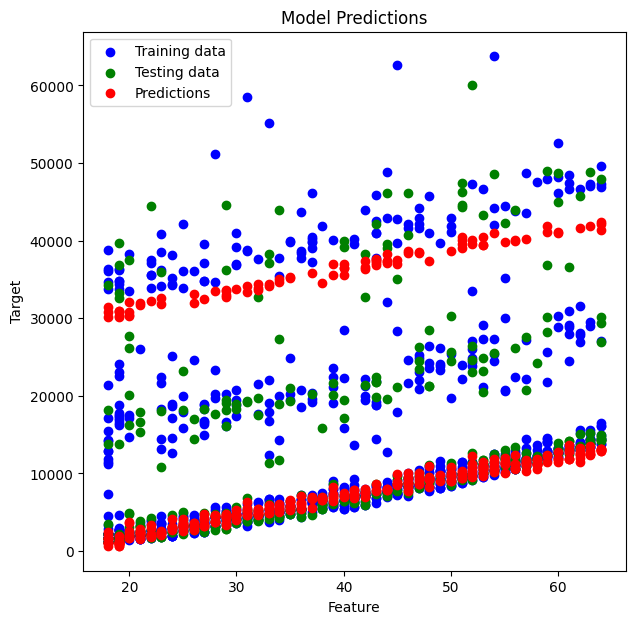

In [38]:
#套用上面的定義，選取一個自變項的索引進行可視化呈現
plot_predictions(x_train.iloc[:,0],y_train,x_test.iloc[:,0],y_test,y_preds_2)

Text(0.5, 0, 'Epochs')

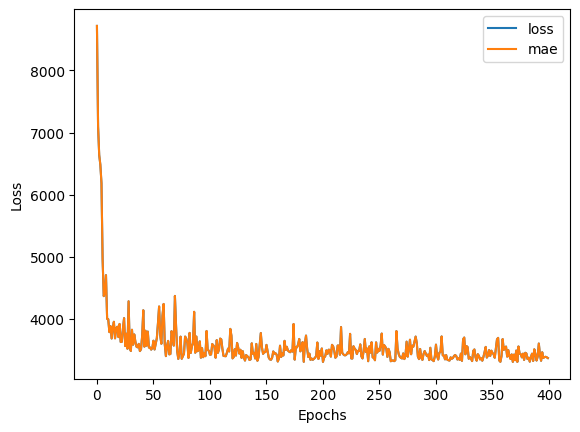

In [28]:
#繪製模型訓練過程中的損失曲線
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [42]:
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing_npz',
                                             test_split=0.3,seed=1234)

57026/57026 [==============================] - 0s 0us/step


In [43]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [46]:
tf.random.set_seed(1234)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(150),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.Adam() ,
              metrics = ['mae'])

history = model_3.fit(x_train , y_train , epochs  = 300 )

Epoch 1/300
12/12 [==============================] - 2s 4ms/step - loss: 132.0953 - mae: 132.0953
Epoch 2/300
12/12 [==============================] - 0s 3ms/step - loss: 41.9911 - mae: 41.9911
Epoch 3/300
12/12 [==============================] - 0s 3ms/step - loss: 18.8119 - mae: 18.8119
Epoch 4/300
12/12 [==============================] - 0s 3ms/step - loss: 15.4931 - mae: 15.4931
Epoch 5/300
12/12 [==============================] - 0s 3ms/step - loss: 9.2994 - mae: 9.2994
Epoch 6/300
12/12 [==============================] - 0s 3ms/step - loss: 7.6900 - mae: 7.6900
Epoch 7/300
12/12 [==============================] - 0s 3ms/step - loss: 8.6655 - mae: 8.6655
Epoch 8/300
12/12 [==============================] - 0s 3ms/step - loss: 8.4441 - mae: 8.4441
Epoch 9/300
12/12 [==============================] - 0s 3ms/step - loss: 6.9065 - mae: 6.9065
Epoch 10/300
12/12 [==============================] - 0s 3ms/step - loss: 6.9724 - mae: 6.9724
Epoch 11/300
12/12 [=============================

In [47]:
model_3.evaluate(x_test , y_test)

5/5 [==============================] - 1s 6ms/step - loss: 4.3085 - mae: 4.3085


[4.3084716796875, 4.3084716796875]

In [48]:
y_preds_3 = model_3.predict(x_test)
y_preds_3

5/5 [==============================] - 0s 3ms/step


array([[28.81822  ],
       [19.892498 ],
       [31.460745 ],
       [28.959227 ],
       [30.106499 ],
       [25.672306 ],
       [19.130829 ],
       [22.370575 ],
       [21.69711  ],
       [22.824455 ],
       [24.583704 ],
       [21.366371 ],
       [19.596811 ],
       [23.458183 ],
       [19.633213 ],
       [22.31372  ],
       [20.623098 ],
       [20.773544 ],
       [22.05538  ],
       [25.471159 ],
       [18.970911 ],
       [20.910845 ],
       [21.797548 ],
       [14.607679 ],
       [25.99475  ],
       [22.567688 ],
       [29.111835 ],
       [17.057804 ],
       [24.658062 ],
       [24.22454  ],
       [22.706778 ],
       [21.981804 ],
       [24.812283 ],
       [20.453833 ],
       [29.773705 ],
       [31.989614 ],
       [21.070831 ],
       [34.27863  ],
       [18.908123 ],
       [19.96489  ],
       [23.458256 ],
       [22.376205 ],
       [32.626152 ],
       [21.300179 ],
       [23.697447 ],
       [28.594564 ],
       [26.513731 ],
       [16.75

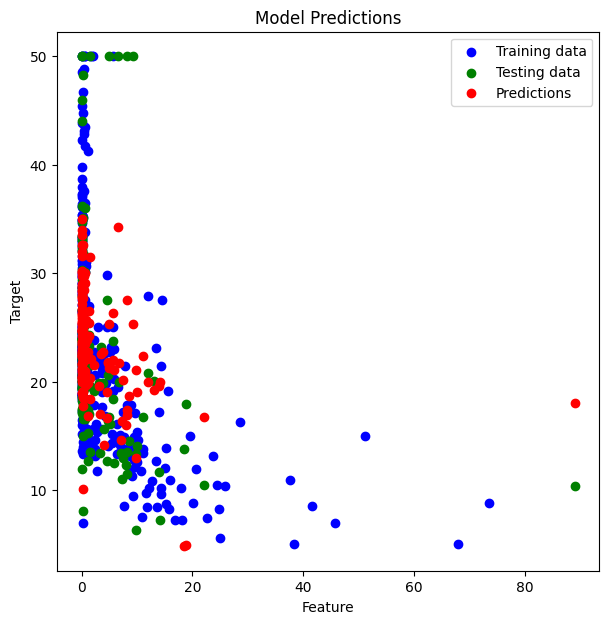

In [51]:
plot_predictions(x_train[:,0],y_train,x_test[:,0],y_test,y_preds_3)

Text(0.5, 0, 'Epochs')

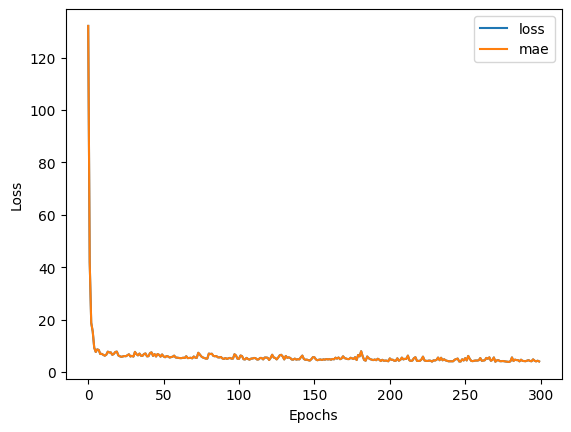

In [61]:
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')